### Need proper explanation??

-Pick one of the company data files and build your own classifier??

--When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another. ???

---Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor. ????



For the sentiment analysis, I am using yelp data. The fetures are Sentences and Score, where score is 0 or 1 depending on sentiment words in that sentence.

## Libraries Used:

In [11]:
#libraries that I will use for this analysis
%matplotlib inline 
import numpy as np #for mathematical problems and array
import pandas as pd #for data manipulation and analysis
import scipy #for solving problems using numpy
import sklearn #for classification
import matplotlib.pyplot as plt #for poltting visualization
import seaborn as sns #for ploting visualization

In [12]:
#reading yelp data
yelp = pd.read_csv("yelp_labelled.txt", delimiter= '\t') 

In [13]:
#column names, Sentence and score
yelp.columns = ['sentence', 'score']
yelp

,sentence,score
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0
5,Honeslty it didn't taste THAT fresh.),0
6,The potatoes were like rubber and you could te...,0
7,The fries were great too.,1
8,A great touch.,1
9,Service was very prompt.,1


Loaded the dataset, and got two columns: sentence and score, where score is given for the sentiment. 

In [15]:
yelp[yelp['score']== 1]

,sentence,score
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
7,The fries were great too.,1
8,A great touch.,1
9,Service was very prompt.,1
12,"I tried the Cape Cod ravoli, chicken,with cran...",1
15,Highly recommended.,1
20,"The food, amazing.",1
21,Service is also cute.,1
22,I could care less... The interior is just beau...,1


In [113]:
keywords_good = ['great', 'good', 'nice', 'awesome', 'exciting', 'amazing', 'caring', 'polite', 'satisfying', 
                 'excellent', 'love', 'delighfull', 'pleasure', 'recommend', 'cute', 'prompt.', 'enjoyed', 
                'amazing!!!!!!!!!!', 'fav', 'Highly recommended', 'glad', 'receives stars', 'like', 'fresh and delicious!',
                'fresh', 'tasty', 'clean', 'huge', 'friendly', 'fantastic' ]
keywords_bad = ['bad', 'worse', 'hate', 'awful', 'poor service', 'not good', 'worst', 'bad experience', 'waste',
               'not a deal good', 'slow', 'cold', 'dry', 'rude', 'overpriced', 'salty']

In [114]:
for key in keywords_good:
  yelp[str(key)] = yelp.sentence.str.contains(
        str(key),
        case=False
    )

In [115]:
for key in keywords_bad:
  yelp[str(key)] = yelp.sentence.str.contains(
        str(key),
        case=False
    )

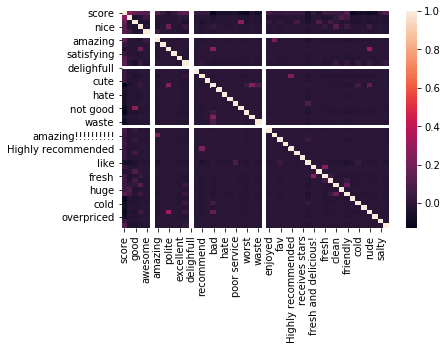

In [116]:
sns.heatmap(yelp.corr())

In [117]:
data = yelp[keywords_good + keywords_bad]
target = yelp['score']

In [118]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 999 points : 257


In [119]:
# Calculate the accuracy of your model here 
(((target == y_pred).sum())/data.shape[0])*100

74.27427427427428

In [120]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[457,  43],
       [214, 285]])

Sensitivity = 285/499 * 100 = 57%

Specificity = 457/ 500 * 100 = 91.4% 

In [121]:
yelp[target != y_pred]

,sentence,score,great,good,nice,awesome,exciting,amazing,caring,polite,...,clean,huge,friendly,slow,cold,dry,rude,overpriced,salty,fantastic
1,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,"I tried the Cape Cod ravoli, chicken,with cran...",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,I could care less... The interior is just beau...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,So they performed.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,"Also there are combos like a burger, fries, an...",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31,I found this place by accident and I could not...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,seems like a good quick place to grab a bite o...,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,"Overall, I like this place a lot.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,The only redeeming quality of the restaurant w...,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


What to do next?